<a href="https://colab.research.google.com/github/maxscharf/Participation-Tracker/blob/main/Precalc_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
human_data = pd.read_csv("/content/Random Numbers Data - Form Responses.csv")
human_data = human_data[["List"]]
human_data

,List
0,101010111101010010011010110010
1,010100101011010101010010000010
2,0111001100011100101100010010001
3,101100010101101010101011010111
4,010000101000100101000101001010
...,...
123,1100110101011000110110100110
124,100101001010011001010111101001110
125,100110101101001101011101001101
126,01011011110101010111110010100


##Data Cleaning


In [ ]:
human_data.dropna(inplace=True)
def cut_to_30(row):
  nums = row['List']
  list_as_string = list(str(nums))
  return ''.join(list_as_string[:30])


human_data.apply(cut_to_30, axis=1)
human_data['List'] = human_data.apply(cut_to_30, axis=1)
[string for string in human_data['List'] if len(string) >= 30]
human_data

,List
0,101010111101010010011010110010
1,010100101011010101010010000010
2,011100110001110010110001001000
3,101100010101101010101011010111
4,010000101000100101000101001010
...,...
123,1100110101011000110110100110
124,100101001010011001010111101001
125,100110101101001101011101001101
126,01011011110101010111110010100


In [ ]:
class HumanDataObject:
    def __init__(self, binary, longest_streak, amt_1s, all_streaks):
        self.binary = binary
        self.longest_streak = longest_streak
        self.amt_1s = amt_1s
        self.all_streaks = all_streaks

    # Getters and setters
    def get_binary(self):
        return self.binary

    def set_binary(self, binary):
        self.binary = binary

    def get_longest_streak(self):
        return self.longest_streak

    def set_longest_streak(self, longest_streak):
        self.longest_streak = longest_streak

    def get_amt_1s(self):
        return self.amt_1s

    def set_amt_1s(self, amt_1s):
        self.amt_1s = amt_1s

    def append_to_streaks(self, value):
        self.all_streaks.append(value)

    def get_all_streaks(self):
        return self.all_streaks


class LongestStreakCalculator:
    @staticmethod
    def main():
        human_data_objects = [HumanDataObject(human_data['List'].iloc[i], 1, 0, []) for i in range(len(human_data))]  # Adjust the range

        for i in range(len(human_data_objects)):
            current_binary = human_data_objects[i].get_binary()
            j = 0
            current_streak = 1

            while j < len(current_binary) - 1:
                if current_binary[j] == current_binary[j + 1]:
                    current_streak += 1
                    if current_streak > human_data_objects[i].get_longest_streak():
                        human_data_objects[i].set_longest_streak(current_streak)
                else:
                    human_data_objects[i].append_to_streaks(current_streak)
                    current_streak = 1
                j += 1
                human_data_objects[i].append_to_streaks(current_streak)

            human_data.loc[i, 'longest_streak'] = human_data_objects[i].get_longest_streak()
            average_streak_length = (sum(human_data_objects[i].get_all_streaks())) / round(len(human_data_objects[i].get_all_streaks()) , 2)
            human_data.loc[i, 'average_streak_length'] = round(average_streak_length, 2)


if __name__ == '__main__':
    LongestStreakCalculator.main()

print(human_data)


                               List  longest_streak  average_streak_length
0    101010111101010010011010110010             4.0                   1.38
1    010100101011010101010010000010             5.0                   1.39
2    011100110001110010110001001000             3.0                   1.77
3    101100010101101010101011010111             3.0                   1.27
4    010000101000100101000101001010             4.0                   1.47
..                              ...             ...                    ...
123    1100110101011000110110100110             3.0                   1.48
124  100101001010011001010111101001             4.0                   1.43
125  100110101101001101011101001101             3.0                   1.39
126   01011011110101010111110010100             5.0                   1.61
127  100101001101011101010100100101             3.0                   1.29

[128 rows x 3 columns]


In [ ]:
class LongestStreakCalculator:
    @staticmethod
    def main():
        human_data_objects = [HumanDataObject(human_data['List'].iloc[i], 1, 0, []) for i in range(len(human_data))]  # Adjust the range
        total_average_streak = 0;
        for i in range(len(human_data_objects)):
            current_binary = human_data_objects[i].get_binary()
            j = 0
            current_streak = 1

            while j < len(current_binary) - 1:
                if current_binary[j] == current_binary[j + 1]:
                    current_streak += 1
                    if current_streak > human_data_objects[i].get_longest_streak():
                        human_data_objects[i].set_longest_streak(current_streak)
                else:
                    human_data_objects[i].append_to_streaks(current_streak)
                    current_streak = 1
                j += 1

            human_data.loc[i, 'longest_streak'] = human_data_objects[i].get_longest_streak()
            average_streak_length = (sum(human_data_objects[i].get_all_streaks())) / round(len(human_data_objects[i].get_all_streaks()) , 2)
            human_data.loc[i, 'average_streak_length'] = round(average_streak_length, 2)

            total_average_streak += average_streak_length


        # Compute and print the final average of the longest_streak values
        longest_streak_values = [data_object.get_longest_streak() for data_object in human_data_objects]
        if longest_streak_values:
            average_longest_streak = sum(longest_streak_values) / len(longest_streak_values)
            print(f"The total average longest streak length for the entire list is: {round(average_longest_streak, 2)}")
        else:
            print("No longest streak values found.")

        average_average_streak_length = total_average_streak / len(human_data_objects)
        print(f"The average average streak length for the entire list is: {round(average_average_streak_length, 2)}")

        for i in range(len(human_data_objects)):
          human_data.loc[i, 'num_streaks'] = int(len(human_data_objects[i].get_all_streaks()))

        for i in range(len(human_data_objects)):
          temp_list = list(human_data_objects[i].get_binary())
          temp_int_list = [int(x) for x in temp_list]
          human_data.loc[i, 'amt_1s'] = sum(temp_int_list)

        print(human_data)

if __name__ == '__main__':
    LongestStreakCalculator.main()

# Print the updated dataframe with the longest_streak column


The total average longest streak length for the entire list is: 4.16
The average average streak length for the entire list is: 1.68
                               List  longest_streak  average_streak_length  \
0    101010111101010010011010110010             4.0                   1.38   
1    010100101011010101010010000010             5.0                   1.32   
2    011100110001110010110001001000             3.0                   1.93   
3    101100010101101010101011010111             3.0                   1.23   
4    010000101000100101000101001010             4.0                   1.45   
..                              ...             ...                    ...   
123    1100110101011000110110100110             3.0                   1.59   
124  100101001010011001010111101001             4.0                   1.45   
125  100110101101001101011101001101             3.0                   1.45   
126   01011011110101010111110010100             5.0                   1.50   
127  10010

# Computer Data

In [ ]:
import pandas as pd
import random

# Function to generate a random 30-bit binary number as a string
def generate_binary_string():
    return ''.join(str(random.choice([0, 1])) for _ in range(30))

# Generating a list of 1000 random binary numbers
computer_binary_list = [generate_binary_string() for _ in range(1000)]

# Create a DataFrame from the list
computer_df = pd.DataFrame({"Binary Numbers": computer_binary_list})

# Define a class for the ComputerDataObject
class ComputerDataObject:
    def __init__(self, binary, longest_streak, amt_1s, all_streaks):
        self.binary = binary
        self.longest_streak = longest_streak
        self.amt_1s = amt_1s
        self.all_streaks = all_streaks

    # Getters and setters for the class attributes
    def get_binary(self):
        return self.binary

    def set_binary(self, binary):
        self.binary = binary

    def get_longest_streak(self):
        return self.longest_streak

    def set_longest_streak(self, longest_streak):
        self.longest_streak = longest_streak

    def get_amt_1s(self):
        return self.amt_1s

    def set_amt_1s(self, amt_1s):
        self.amt_1s = amt_1s

    def append_to_streaks(self, value):
        self.all_streaks.append(value)

    def get_all_streaks(self):
        return self.all_streaks


# Define a class for calculating the longest streak
class LongestStreakCalculator:
    @staticmethod
    def main():
        # Create a list of ComputerDataObjects from the computer_binary_list
        computer_data_objects = [ComputerDataObject(binary, 1, 0, []) for binary in computer_binary_list]


        # Iterate over the computer_data_objects list
        for i in range(len(computer_data_objects)):
            current_binary = computer_data_objects[i].get_binary()
            j = 0
            current_streak = 1

            # Calculate the longest streak of the same bit within the binary string
            while j < len(current_binary) - 1:
                if current_binary[j] == current_binary[j + 1]:
                    current_streak += 1
                    if current_streak > computer_data_objects[i].get_longest_streak():
                        computer_data_objects[i].set_longest_streak(current_streak)
                else:
                  computer_data_objects[i].append_to_streaks(current_streak)
                  current_streak = 1
                j += 1
            computer_data_objects[i].append_to_streaks(current_streak)

            # Update the DataFrame at the specified location with the longest streak value
            computer_df.loc[i, 'longest_streak'] = computer_data_objects[i].get_longest_streak()
            average_streak_length = (sum(computer_data_objects[i].get_all_streaks())) / round(len(computer_data_objects[i].get_all_streaks()) , 2)
            computer_df.loc[i, 'average_streak_length'] = round(average_streak_length, 2)


# Run the LongestStreakCalculator main method if the script is run as the main program
if __name__ == '__main__':
    LongestStreakCalculator.main()

# Print the DataFrame
print(computer_df)


                     Binary Numbers  longest_streak  average_streak_length
0    001011100100010101101010001011             3.0                   1.50
1    101001000110100011101010111001             3.0                   1.58
2    001101110001000011011100111011             4.0                   2.14
3    110111000010101111011010000000             7.0                   2.14
4    011001001100011000001000011100             5.0                   2.31
..                              ...             ...                    ...
995  010111001110010000000101110000             7.0                   2.31
996  110000100010110101011111000000             6.0                   2.14
997  101010100010110101010101111010             4.0                   1.25
998  000101011100110100111010100010             3.0                   1.58
999  111001011101100010011000111010             3.0                   1.88

[1000 rows x 3 columns]


In [ ]:
import numpy as np
class LongestStreakCalculator:
    @staticmethod
    def main():
        # Create a list of ComputerDataObjects from the computer_binary_list
        computer_data_objects = [ComputerDataObject(binary, 1, 0, []) for binary in computer_binary_list]

        total_longest_streak = 0
        total_average_streak = 0
        # Iterate over the computer_data_objects list
        for i in range(len(computer_data_objects)):
            current_binary = computer_data_objects[i].get_binary()
            j = 0
            current_streak = 1

            # Calculate the longest streak of the same bit within the binary string
            while j < len(current_binary) - 1:
                if current_binary[j] == current_binary[j + 1]:
                    current_streak += 1
                    if current_streak > computer_data_objects[i].get_longest_streak():
                        computer_data_objects[i].set_longest_streak(current_streak)
                else:
                  computer_data_objects[i].append_to_streaks(current_streak)
                  current_streak = 1
                j += 1
            computer_data_objects[i].append_to_streaks(current_streak)

            # Update the DataFrame at the specified location with the longest streak value
            computer_df.loc[i, 'longest_streak'] = computer_data_objects[i].get_longest_streak()
            average_streak_length = (sum(computer_data_objects[i].get_all_streaks())) / len(computer_data_objects[i].get_all_streaks())


            computer_df.loc[i, 'average_streak_length'] = round(average_streak_length, 2)

            # Add the longest streak to the total longest streak
            total_longest_streak += computer_data_objects[i].get_longest_streak()
            total_average_streak += average_streak_length

        # Calculate the average longest streak
        average_longest_streak = total_longest_streak / len(computer_data_objects)
        average_average_streak_length = total_average_streak / len(computer_data_objects)

        for i in range(len(computer_data_objects)):
          computer_df.loc[i, 'num_streaks'] = int(len(computer_data_objects[i].get_all_streaks()))

        for i in range(len(computer_data_objects)):
          temp_list = list(computer_data_objects[i].get_binary())
          temp_int_list = [int(x) for x in temp_list]
          computer_df.loc[i, 'amt_1s'] = sum(temp_int_list)


          # Print the average longest streak
        print(f"The total average longest streak length for the entire list is: {round(average_longest_streak, 2)}")
        print(f"The average average streak length for the entire list is: {round(average_average_streak_length, 2)}")
        print(computer_df)
# Run the LongestStreakCalculator main method if the script is run as the main program
if __name__ == '__main__':
    LongestStreakCalculator.main()


The total average longest streak length for the entire list is: 5.14
The average average streak length for the entire list is: 1.99
                     Binary Numbers  longest_streak  average_streak_length  \
0    001011100100010101101010001011             3.0                   1.50   
1    101001000110100011101010111001             3.0                   1.58   
2    001101110001000011011100111011             4.0                   2.14   
3    110111000010101111011010000000             7.0                   2.14   
4    011001001100011000001000011100             5.0                   2.31   
..                              ...             ...                    ...   
995  010111001110010000000101110000             7.0                   2.31   
996  110000100010110101011111000000             6.0                   2.14   
997  101010100010110101010101111010             4.0                   1.25   
998  000101011100110100111010100010             3.0                   1.58   
999  11100

##Exploratory Data Analysis
average streak length ✅
  Average Standard deviation

longest streak length ✅
  Average Standard deviation

number of streaks

variability (deviation from 50/50)

Median (for human)

distribution

##Ask Chase...


*   How to standardize charts?

* do sample sizes need to be the same?

* How to analyze std


### Finding the Mean and Std.

Compare this to the mean and std of human data

In [ ]:
import numpy as np
computer_longest_streak_mean = np.mean(computer_df['longest_streak'])
computer_longest_streak_std = np.std(computer_df['longest_streak'])

computer_average_streak_mean = np.mean(computer_df.loc[:, 'average_streak_length'])
computer_average_streak_std = np.std(computer_df.loc[:, 'average_streak_length'])

computer_num_streaks_mean = np.mean(computer_df.loc[:, 'num_streaks'])
computer_num_streaks_std = np.std(computer_df.loc[:, 'num_streaks'])

computer_amt_1s_mean = np.mean(computer_df.loc[:, 'amt_1s'])
computer_amt_1s_std = np.std(computer_df.loc[:, 'amt_1s'])

human_longest_streak_mean = np.mean(human_data['longest_streak'])
human_longest_streak_std = np.std(human_data['longest_streak'])

human_average_streak_mean = np.mean(human_data.loc[:, 'average_streak_length'])
human_average_streak_std = np.std(human_data.loc[:, 'average_streak_length'])

human_num_streaks_mean = np.mean(human_data.loc[:, 'num_streaks'])
human_num_streaks_std = np.std(human_data.loc[:, 'num_streaks'])

human_amt_1s_mean = np.mean(human_data.loc[:, 'amt_1s'])
human_amt_1s_std = np.std(human_data.loc[:, 'amt_1s'])

human_average_streak_std

0.48117369524943904

## Graphing Histograms


(array([112., 281., 284., 147.,  90.,  69.,  10.,   4.,   1.,   2.]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ]),
 <BarContainer object of 10 artists>)

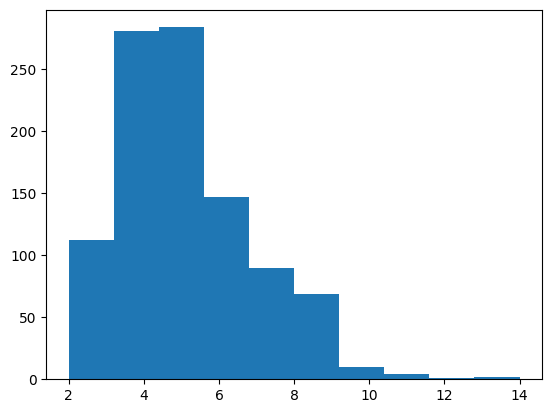

In [ ]:
import matplotlib.pyplot as plt

longest_streak = computer_df.loc[:, 'longest_streak']

plt.hist(longest_streak)
# plt.hist(longest_strea_humans)

(array([ 70., 295., 416.,  96.,  96.,  17.,   5.,   0.,   2.,   3.]),
 array([1.25 , 1.554, 1.858, 2.162, 2.466, 2.77 , 3.074, 3.378, 3.682,
        3.986, 4.29 ]),
 <BarContainer object of 10 artists>)

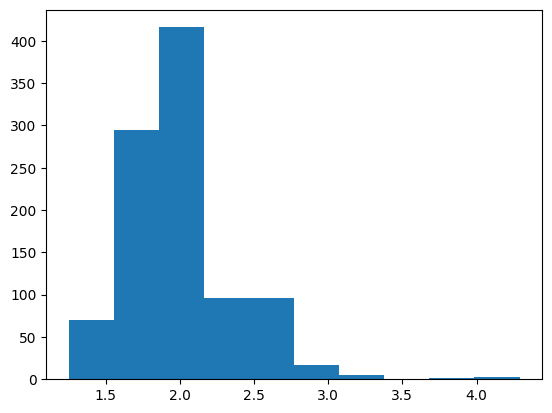

In [ ]:
average_streak_length = computer_df.loc[:, 'average_streak_length']

plt.hist(average_streak_length)

This follows a normal distribution because its an average and the Central Limit Theorem.

(array([ 11.,  45.,  99., 186., 220., 203., 131.,  70.,  25.,  10.]),
 array([0.92857559, 1.15616849, 1.38376139, 1.61135429, 1.8389472 ,
        2.0665401 , 2.294133  , 2.52172591, 2.74931881, 2.97691171,
        3.20450461]),
 <BarContainer object of 10 artists>)

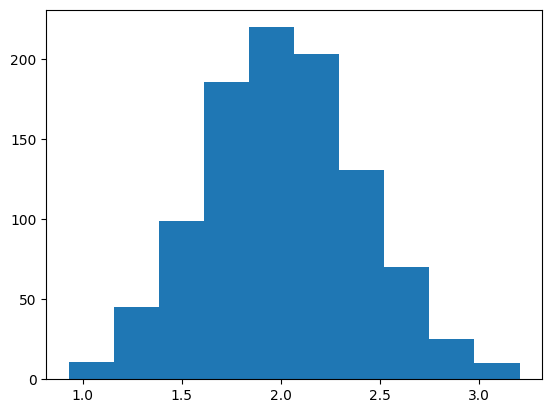

In [ ]:
plt.hist(np.random.normal(2.0009200000000003, 0.3843419748088933, 1000))

### Logistic Regrsesion

###Human Charts

In [ ]:
human_data['is_computer'] = 0
human_data

,List,longest_streak,average_streak_length,num_streaks,amt_1s,is_computer
0,101010111101010010011010110010,4.0,1.38,21.0,16.0,0
1,010100101011010101010010000010,5.0,1.32,22.0,12.0,0
2,011100110001110010110001001000,3.0,1.93,14.0,13.0,0
3,101100010101101010101011010111,3.0,1.23,22.0,17.0,0
4,010000101000100101000101001010,4.0,1.45,20.0,10.0,0
...,...,...,...,...,...,...
123,1100110101011000110110100110,3.0,1.59,17.0,15.0,0
124,100101001010011001010111101001,4.0,1.45,20.0,15.0,0
125,100110101101001101011101001101,3.0,1.45,20.0,17.0,0
126,01011011110101010111110010100,5.0,1.50,18.0,17.0,0


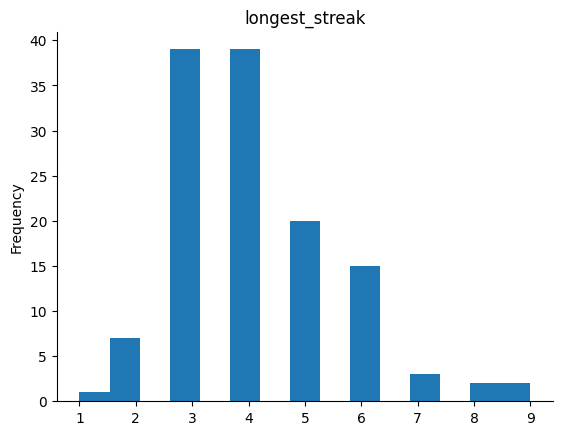

In [ ]:
from matplotlib import pyplot as plt
human_data['longest_streak'].plot(kind='hist', bins=15, title='longest_streak')
plt.gca().spines[['top', 'right',]].set_visible(False)

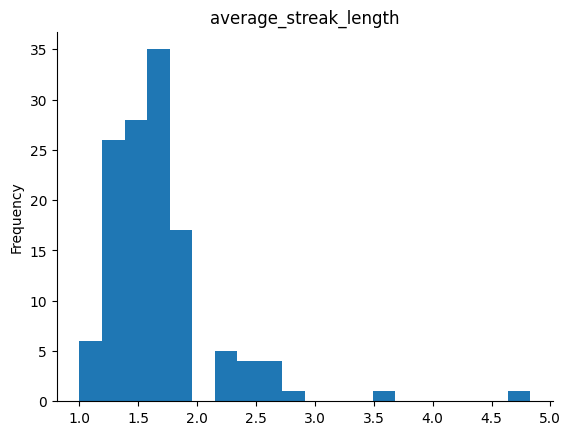

In [ ]:
from matplotlib import pyplot as plt
human_data['average_streak_length'].plot(kind='hist', bins=20, title='average_streak_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

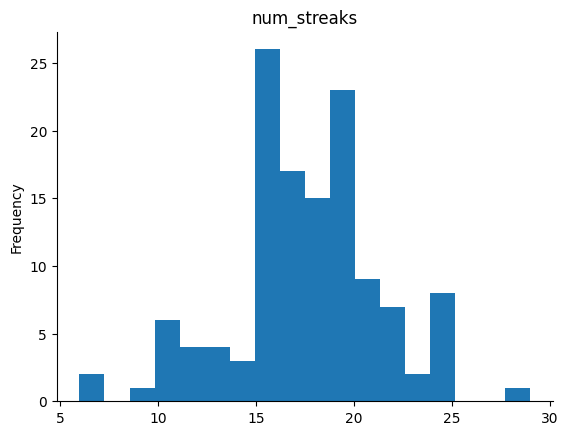

In [ ]:
from matplotlib import pyplot as plt
human_data['num_streaks'].plot(kind='hist', bins=18, title='num_streaks')
plt.gca().spines[['top', 'right',]].set_visible(False)

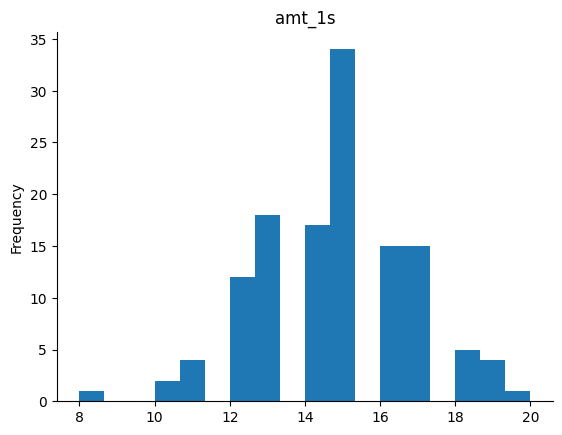

In [ ]:
from matplotlib import pyplot as plt
human_data['amt_1s'].plot(kind='hist', bins=18, title='amt_1s')
plt.gca().spines[['top', 'right',]].set_visible(False)

###Computer Charts


In [ ]:
computer_df['is_computer'] = 1
computer_df

,Binary Numbers,longest_streak,average_streak_length,num_streaks,amt_1s,is_computer
0,001011100100010101101010001011,3.0,1.50,20.0,14.0,1
1,101001000110100011101010111001,3.0,1.58,19.0,15.0,1
2,001101110001000011011100111011,4.0,2.14,14.0,16.0,1
3,110111000010101111011010000000,7.0,2.14,14.0,14.0,1
4,011001001100011000001000011100,5.0,2.31,13.0,11.0,1
...,...,...,...,...,...,...
995,010111001110010000000101110000,7.0,2.31,13.0,12.0,1
996,110000100010110101011111000000,6.0,2.14,14.0,13.0,1
997,101010100010110101010101111010,4.0,1.25,24.0,16.0,1
998,000101011100110100111010100010,3.0,1.58,19.0,14.0,1


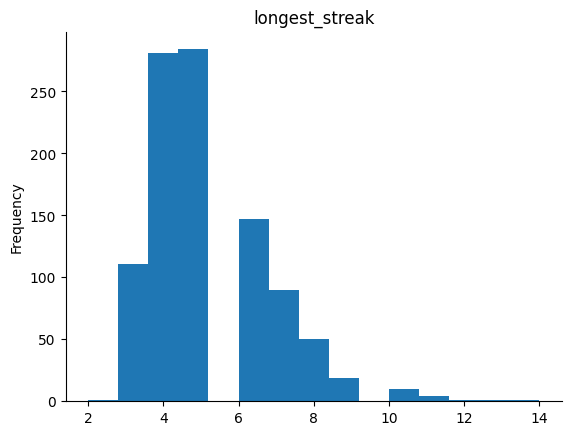

In [ ]:
from matplotlib import pyplot as plt
computer_df['longest_streak'].plot(kind='hist', bins=15, title='longest_streak')
plt.gca().spines[['top', 'right',]].set_visible(False)

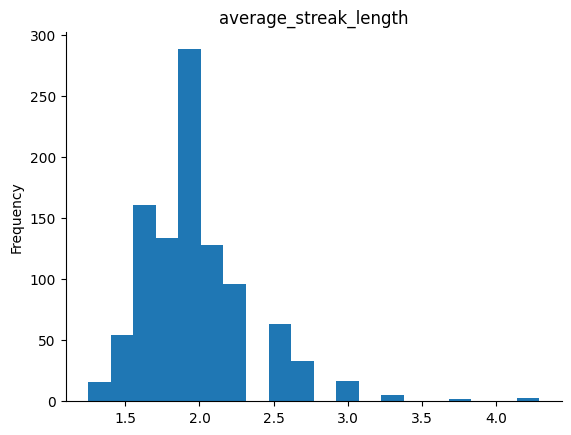

In [ ]:
from matplotlib import pyplot as plt
computer_df['average_streak_length'].plot(kind='hist', bins=20, title='average_streak_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

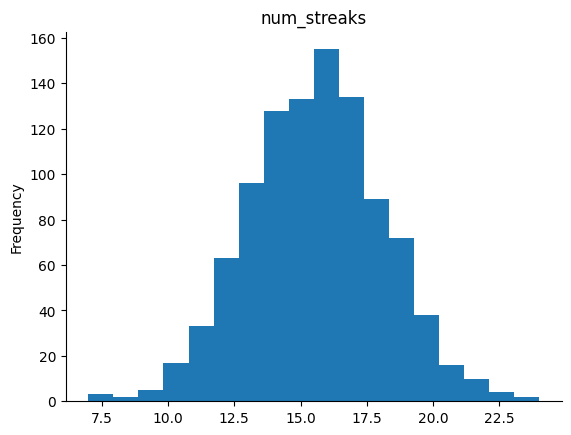

In [ ]:
from matplotlib import pyplot as plt
computer_df['num_streaks'].plot(kind='hist', bins=18, title='num_streaks')
plt.gca().spines[['top', 'right',]].set_visible(False)

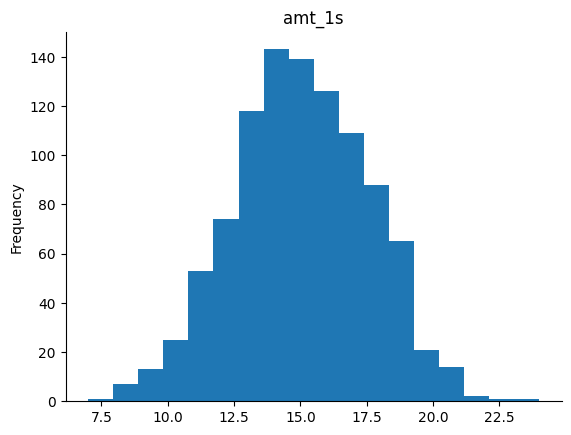

In [ ]:
from matplotlib import pyplot as plt
computer_df['amt_1s'].plot(kind='hist', bins=18, title='amt_1s')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Means & Standard Deviations

In [ ]:
data_types_list = ["Longest Streak" , "Average Streak Length" , "Number of Streaks" , "Amount of 1s"]


m_std_data = {'Data Type': ["Longest Streak" , "Average Streak Length" , "Number of Streaks" , "Amount of 1s"],
        'Human Mean': [human_longest_streak_mean, human_average_streak_mean, human_num_streaks_mean, human_amt_1s_mean],
        'Human Std.': [human_longest_streak_std, human_average_streak_std, human_num_streaks_std, human_amt_1s_std],
        'Computer Mean': [computer_longest_streak_mean, computer_average_streak_mean, computer_num_streaks_mean, computer_amt_1s_mean],
        'Computer Std.': [computer_longest_streak_std, computer_average_streak_std, computer_num_streaks_std, computer_amt_1s_std]}
m_std_data['Human Mean'] = [round(x, 3) for x in m_std_data['Human Mean']]
m_std_data['Human Std.'] = [round(x, 3) for x in m_std_data['Human Std.']]
m_std_data['Computer Mean'] = [round(x, 3) for x in m_std_data['Computer Mean']]
m_std_data['Computer Std.'] = [round(x, 3) for x in m_std_data['Computer Std.']]
m_std_df = pd.DataFrame(m_std_data)
m_std_df


,Data Type,Human Mean,Human Std.,Computer Mean,Computer Std.
0,Longest Streak,4.164,1.429,5.145,1.601
1,Average Streak Length,1.680,0.481,1.988,0.383
2,Number of Streaks,17.625,3.849,15.590,2.689
3,Amount of 1s,14.680,2.084,15.015,2.701


Conclusion: all human stds are less, humans are more adverse to deviating from what they expect(?)

Do I need num_streaks?

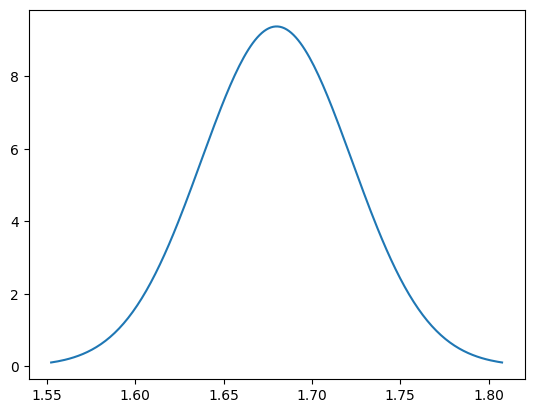

In [ ]:
from scipy.stats import norm
mu, sigma = human_average_streak_mean , human_average_streak_std / len(human_data['List'])**(1/2)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 200)
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)

In [ ]:
def calculate_probability(row):
    random_asl = row['average_streak_length']
    probability = norm.pdf(random_asl, human_average_streak_mean, human_average_streak_std / len(human_data['List'])**(1/2))
    return round(probability, 5)

# Assuming you have 'human_average_streak_mean' and 'human_average_streak_std' defined

# Creating a dataframe
data = {
    'index': range(len(human_data['List'])),
    'average_streak_length': human_data['average_streak_length'],
    'new_probability_value': [calculate_probability(row) for _, row in pd.DataFrame(human_data).iterrows()]
}

df = pd.DataFrame(data)
print(df)

     index  average_streak_length  new_probability_value
0        0                   1.38                0.00000
1        1                   1.32                0.00000
2        2                   1.93                0.00000
3        3                   1.23                0.00000
4        4                   1.45                0.00000
..     ...                    ...                    ...
123    123                   1.59                0.99957
124    124                   1.45                0.00000
125    125                   1.45                0.00000
126    126                   1.50                0.00121
127    127                   1.32                0.00000

[128 rows x 3 columns]


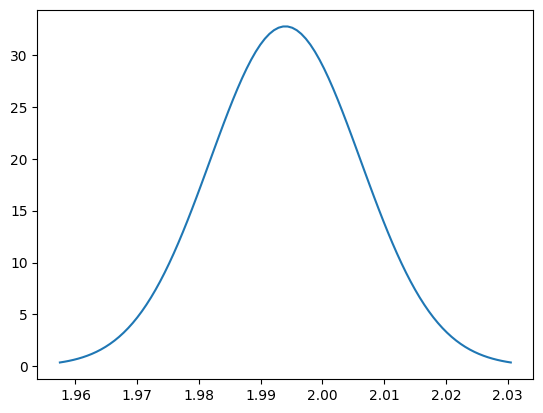

In [ ]:
from scipy.stats import norm
mu, sigma = 1.994 , 0.385 / 1000**(1/2)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)